In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

### Load Data

In [2]:
df = pd.read_csv('Data/Xeek_train_subset_clean.csv')

In [3]:
df.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC
count,133198.000000,133006.000000,125805.000000,108053.000000,133198.000000,91725.000000,100840.000000,132635.000000
mean,1792.944663,13.199399,1.743774,2.199556,69.553872,0.355602,4.511845,122.700286
std,739.441515,3.561386,13.233330,0.236902,39.328728,0.143857,5.092807,34.234879
min,415.261599,5.946157,0.123068,1.366913,0.109284,-0.023143,1.010027,7.415132
25%,1182.822400,11.381848,0.777323,2.029237,43.244637,0.234927,2.857540,87.899776
50%,1747.524495,12.698571,1.130621,2.162121,66.266132,0.382014,3.780121,135.968094
75%,2413.874901,14.944049,1.644573,2.404375,93.808681,0.480985,5.098502,147.388626
max,3272.024000,25.717396,1856.935059,3.115611,804.298950,0.817310,365.575592,230.432953


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   WELL       133198 non-null  object 
 1   DEPTH_MD   133198 non-null  float64
 2   GROUP      133198 non-null  object 
 3   FORMATION  111632 non-null  object 
 4   CALI       133006 non-null  float64
 5   RDEP       125805 non-null  float64
 6   RHOB       108053 non-null  float64
 7   GR         133198 non-null  float64
 8   NPHI       91725 non-null   float64
 9   PEF        100840 non-null  float64
 10  DTC        132635 non-null  float64
 11  LITH       133198 non-null  object 
dtypes: float64(8), object(4)
memory usage: 12.2+ MB


### Explore Data

In [5]:
df['LITH'].nunique()

11

In [6]:
df['LITH'].unique()

array(['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Anhydrite', 'Dolomite', 'Chalk', 'Coal', 'Halite'],
      dtype=object)

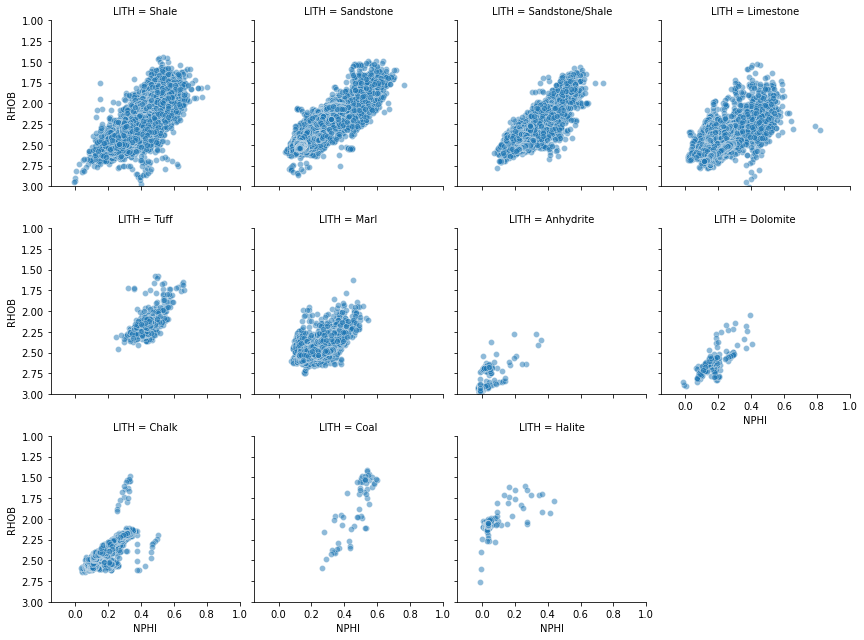

In [7]:
g = sns.FacetGrid(df, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

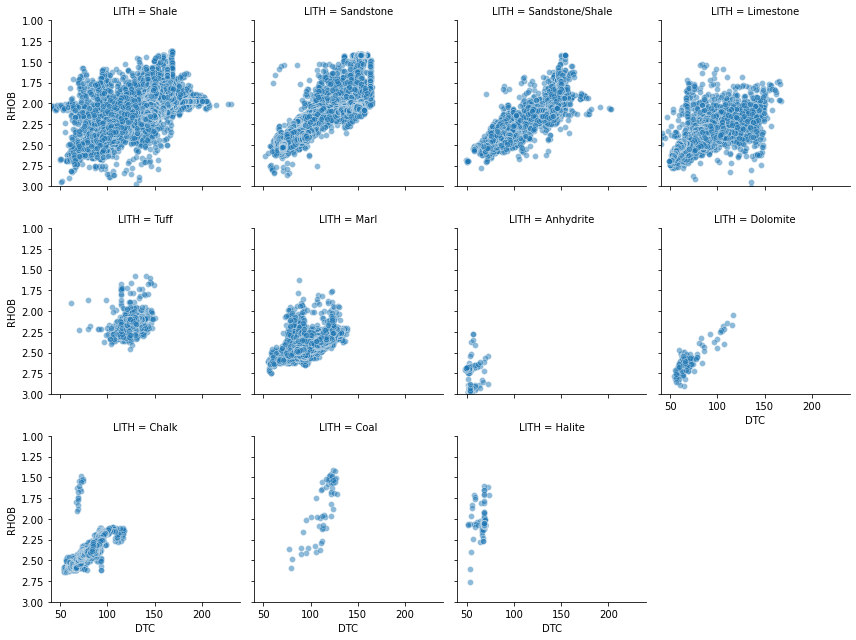

In [9]:
g = sns.FacetGrid(df, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'DTC', 'RHOB', alpha=0.5)
g.set(xlim=(40, 240))
g.set(ylim=(3, 1))

### Deal With Missing Data

<AxesSubplot:>

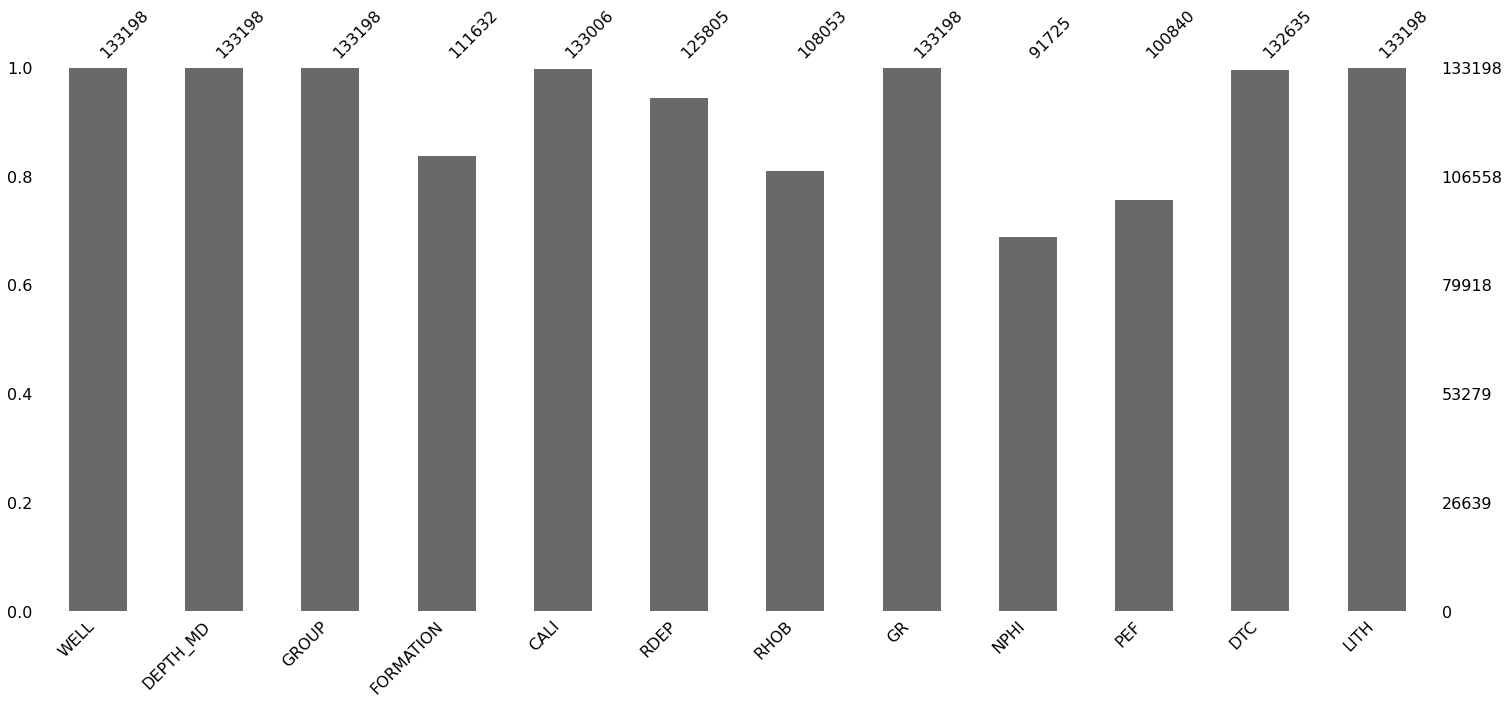

In [10]:
mno.bar(df)

In [11]:
df.dropna(inplace=True)

<AxesSubplot:>

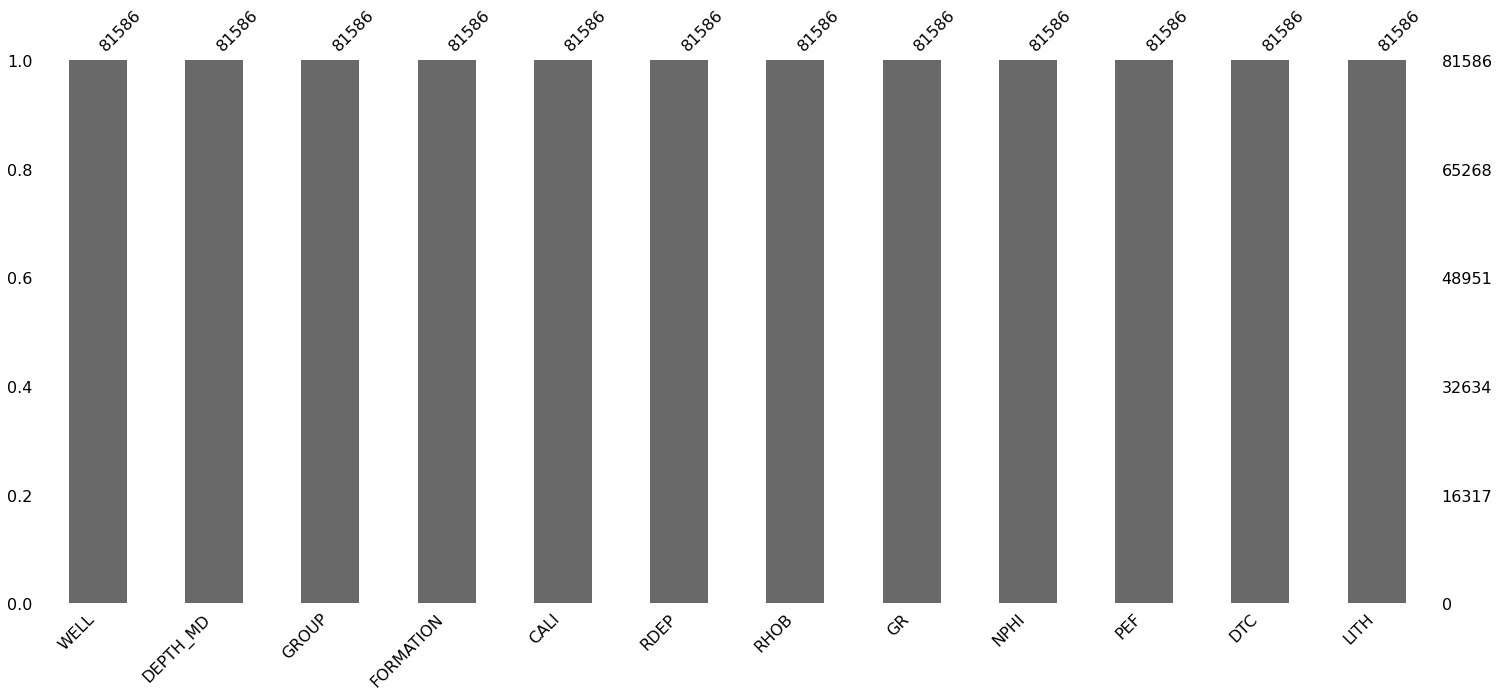

In [13]:
mno.bar(df)

In [14]:
df['LITH'].value_counts()

Shale              48705
Limestone          10973
Sandstone          10076
Sandstone/Shale     4578
Marl                3715
Chalk               2254
Tuff                1034
Dolomite              98
Anhydrite             75
Coal                  58
Halite                20
Name: LITH, dtype: int64

## Creating the Random Forest Model
### Preparing Data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Select inputs and target
X = df[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
y = df['LITH']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Creating Model

In [18]:
clf = RandomForestClassifier()

In [19]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = clf.predict(X_test)

### Evaluating Model

In [22]:
accuracy_score(y_test, y_pred)

0.9113417225036771

In [24]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

      Anhydrite       1.00      1.00      1.00        20
          Chalk       0.85      0.70      0.77       668
           Coal       0.90      0.60      0.72        15
       Dolomite       0.79      0.42      0.55        36
         Halite       0.83      0.56      0.67         9
      Limestone       0.88      0.87      0.87      3210
           Marl       0.88      0.77      0.82      1189
      Sandstone       0.89      0.89      0.89      2941
Sandstone/Shale       0.79      0.65      0.71      1370
          Shale       0.94      0.98      0.96     14705
           Tuff       0.80      0.51      0.62       313

       accuracy                           0.91     24476
      macro avg       0.87      0.72      0.78     24476
   weighted avg       0.91      0.91      0.91     24476



In [ ]:
# Classification Report


In [25]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[   20     0     0     0     0     0     0     0     0     0     0]
 [    0   470     0     0     0   186     1     6     5     0     0]
 [    0     0     9     0     0     0     0     1     0     5     0]
 [    0     0     0    15     0     6     1     9     2     3     0]
 [    0     0     0     0     5     0     0     0     0     4     0]
 [    0    72     0     1     0  2785    68    54    21   207     2]
 [    0     7     0     0     0   110   916    10    13   131     2]
 [    0     0     0     2     0    35    14  2604    97   180     9]
 [    0     2     0     0     0    13     7   133   888   326     1]
 [    0     0     1     1     1    38    31    80    92 14435    26]
 [    0     0     0     0     0     3     3    15     1   132   159]]


In [27]:
labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Anhydrite', 'Dolomite', 'Chalk', 'Coal', 'Halite']
labels.sort()

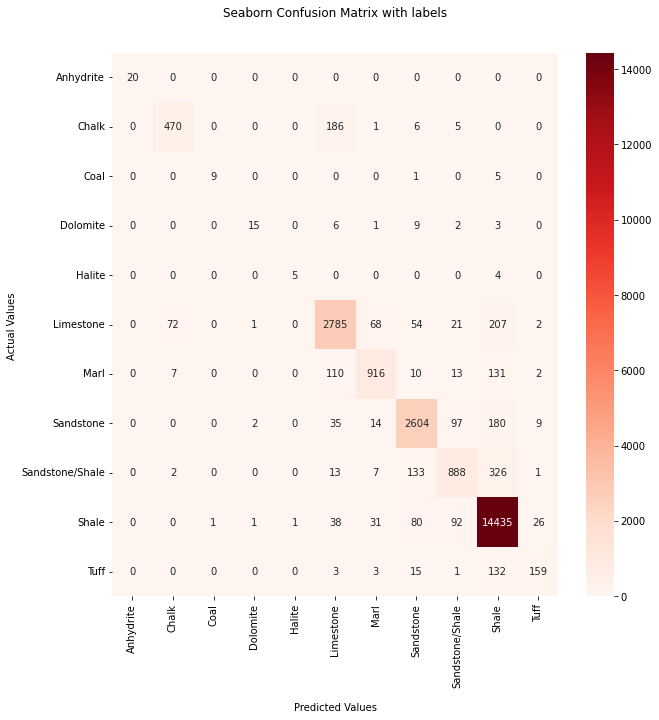

In [28]:

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='.0f',
                xticklabels=labels, 
                yticklabels = labels)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

